# Assignment 3

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Load data:
data = pd.read_csv("A3_BitcoinTransactions.csv")

firstDate = data["Date"].iloc[0]
lastDate = data["Date"].iloc[-1]

# Split data into training and testing:
trainSize = 3146
trainData, testData = train_test_split(data, train_size= trainSize, shuffle= False)

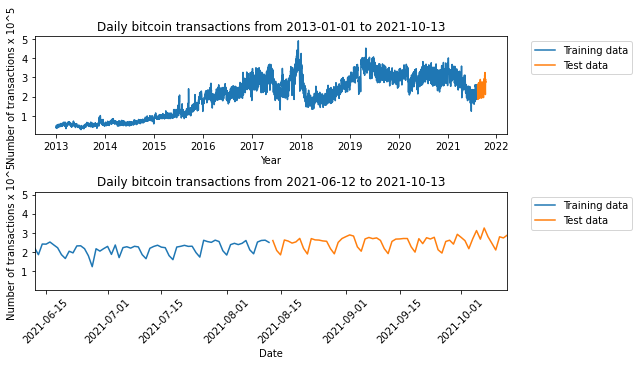

In [4]:
# Plot data:
plt.figure("BitcoinTransactions", figsize=(9,5))
plt.subplot(211)
plt.plot(pd.to_datetime(trainData["Date"]) ,trainData["BitcoinTransactions"])
plt.plot(pd.to_datetime(testData["Date"]), testData["BitcoinTransactions"])
plt.title(f"Daily bitcoin transactions from {firstDate} to {lastDate}")
plt.xlabel("Year")
plt.ylabel("Number of transactions x 10^5")
plt.legend(["Training data", "Test data"], bbox_to_anchor=(1.04,1), loc="upper left")
plt.yticks(ticks= [100000, 200000, 300000, 400000, 500000], labels= [1, 2, 3, 4, 5])

firstDateZoomed = trainData["Date"].iloc[-len(testData)]
lastDateZoomed = lastDate

plt.subplot(212)
plt.plot(pd.to_datetime(trainData["Date"]),trainData["BitcoinTransactions"])
plt.plot(pd.to_datetime(testData["Date"]), testData["BitcoinTransactions"])
plt.title(f"Daily bitcoin transactions from {firstDateZoomed} to {lastDateZoomed}")
plt.xlabel("Date")
plt.ylabel("Number of transactions x 10^5")
plt.legend(["Training data", "Test data"], bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlim(pd.Timestamp(firstDateZoomed), pd.Timestamp(lastDateZoomed))
plt.yticks(ticks= [100000, 200000, 300000, 400000, 500000], labels= [1, 2, 3, 4, 5])
plt.xticks(rotation= 45)

plt.tight_layout()

# Save plot:
plt.savefig("figures/BitcoinTransactions.png", dpi= 300)

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


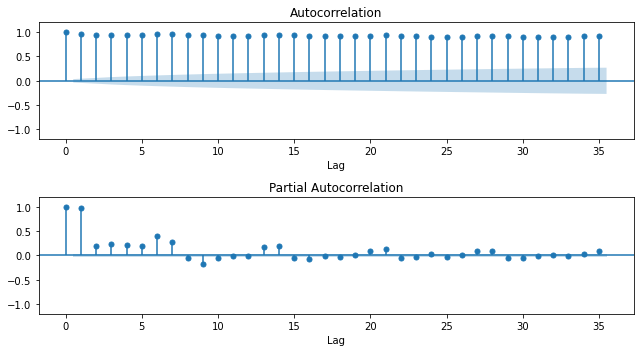

In [5]:
# Plot acf and pacf:
fig = plt.figure(figsize= (9,5))
ax1 = plt.subplot(311)
acfPlot = plot_acf(trainData["BitcoinTransactions"], ax1)
plt.ylim((-1.2, 1.2))
ax1.set_xlabel("Lag")

ax2 = plt.subplot(312)
pacfPlot = plot_pacf(trainData["BitcoinTransactions"], ax2)
plt.ylim((-1.2, 1.2))
ax2.set_xlabel("Lag")

plt.tight_layout()

fig.savefig("figures/acfpacfPlot.png", dpi= 300)

### Model plot
The above time series are non-stationary with both the mean and variance changing over time. This implies ARIMA model with the "I" term to compansate for the non-stationarity. Also from the lower plot is is clear that there are som daily patterns in the data. These patterns is an indicator that some kind of seasonality can be included in the model.

In order to find the order of the "d" part of the ARIMA model, differentiation is used. The order of the "d" is the number of differentiations that need to be used in order to get a sufficiently fast decrease in the autocorrelation function.

### Autocorrelation plot:
The autocorrelation plot are very slowly decaying. This is a clear sign of non-stationarity.

### Partial autocorrelation plot:
From this plot there looks to be seasonality in the MA part of the model. This can be seen as the significant spikes in the data with a periodicity of approximatley 12.

### Transformations:
To "make" this process stationary transformation and differencing are used. 

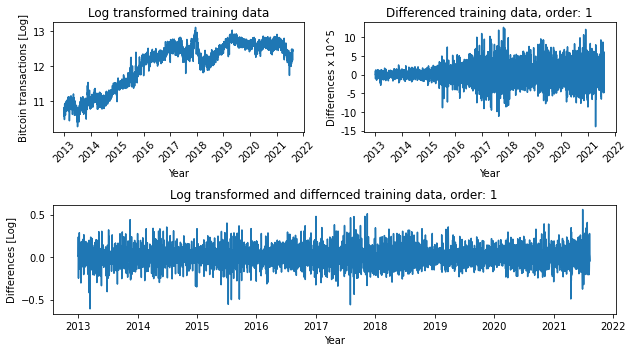

In [71]:
# Order of differencing:
diffOrder = 1

# Do the log transformation and differencing:
logTrainData = np.log(np.array(trainData["BitcoinTransactions"]))
diffTrainData = diff(np.array(trainData["BitcoinTransactions"]))

diffLogTrainData = diff(logTrainData, diffOrder)

# Plotting:
plt.figure(figsize= (9, 5))
plt.subplot(221)
plt.plot(pd.to_datetime(trainData["Date"]), logTrainData)
plt.title("Log transformed training data")
plt.ylabel("Bitcoin transactions [Log]")
plt.xlabel("Year")
plt.xticks(rotation= 45)

plt.subplot(222)
plt.plot(pd.to_datetime(trainData["Date"]).iloc[:len(diffTrainData)], diffTrainData)
plt.title(f"Differenced training data, order: {diffOrder}")
plt.xlabel("Year")
plt.ylabel("Differences x 10^5")
plt.yticks(ticks= [-150000, -100000, -50000, 0, 50000, 100000], labels= [-15, -10, -5, 0, 5, 10])
plt.xticks(rotation= 45)

plt.subplot(212)
plt.plot(pd.to_datetime(trainData["Date"]).iloc[:len(diffLogTrainData)], diffLogTrainData)
plt.title(f"Log transformed and differnced training data, order: {diffOrder}")
plt.ylabel("Differences [Log]")
plt.xlabel("Year")

plt.tight_layout()

# Save plot:
plt.savefig("figures/transformedDifferenced.png", dpi= 300)

### Differentiation:
The above plots are used to find the "d" term in the ARIMA model. We are supposed to find the order of the differentiation that results in a fast enough decrease in the autocorrelation function. By trying different orders, the correct "d" looks to be either 1 or 2.

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


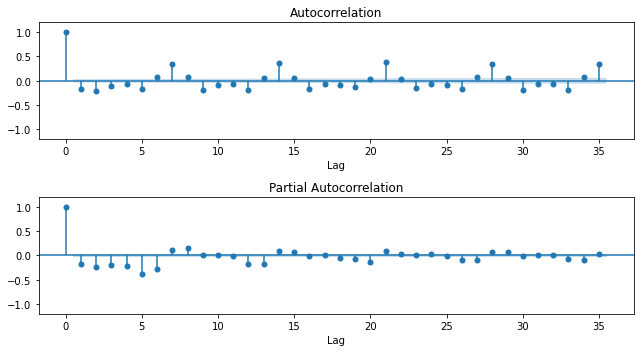

In [72]:
# Plot acf and pacf:
fig = plt.figure(figsize= (9,5))
ax1 = plt.subplot(211)
acfPlot = plot_acf(diffLogTrainData, ax1)
plt.ylim((-1.2, 1.2))
ax1.set_xlabel("Lag")

ax2 = plt.subplot(212)
pacfPlot = plot_pacf(diffLogTrainData, ax2)
plt.ylim((-1.2, 1.2))
ax2.set_xlabel("Lag")

plt.tight_layout()

fig.savefig("figures/TransformedAcfpacfPlot.png", dpi= 300)

From the above plots showing the transformed data and the autocorrelationa and autocorrelation plot there can be seen a clear seasonality of 7 both in the acf and pacf.

In [397]:
possibleOrders = []

for p in range(7, 15):
    for q in range(7, 15):
        possibleOrders.append((p, 1, q))

AIC = []
BIC = []
residuals = []
HQC = []

# Order of the ARIMA model
for order in possibleOrders:
    model = ARIMA(logTrainData,
                    order= order, 
                    enforce_invertibility= True,
                    enforce_stationarity= True)

    res = model.fit()

    AIC.append(res.aic)

    BIC.append(res.bic)

    HQC.append(res.hqic)

    residuals.append(np.sum(res.resid))


/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

In [398]:
print(f"The order with the lowest AIC values is {possibleOrders[AIC.index(min(AIC))]}, with a value of {min(AIC)}")
print(f"The order with the lowest BIC values is {possibleOrders[BIC.index(min(BIC))]}, with a value of {min(BIC)}")
print(f"The order with the lowest HQC values is {possibleOrders[HQC.index(min(HQC))]}, with a value of {min(HQC)}")
print(f"The order with the lowest residuals is {possibleOrders[residuals.index(min(residuals))]}, with a value of {min(residuals)}")

The order with the lowest AIC values is (8, 1, 13), with a value of -6296.409694986984
The order with the lowest BIC values is (7, 1, 7), with a value of -6183.687138412479
The order with the lowest HQC values is (8, 1, 13), with a value of -6248.620618785455
The order with the lowest residuals is (14, 1, 13), with a value of 14.650961040802148


In [417]:
# Order of the model:
order = (7, 1, 7)

model = ARIMA(logTrainData,
                order= order, 
                enforce_stationarity= True,
                enforce_invertibility= True)

res = model.fit()

/Users/emilhaugstvedt/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [418]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3146
Model:                 ARIMA(7, 1, 7)   Log Likelihood                3152.245
Date:                Tue, 16 Nov 2021   AIC                          -6274.491
Time:                        15:36:24   BIC                          -6183.687
Sample:                             0   HQIC                         -6241.907
                               - 3146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5892      0.101     -5.860      0.000      -0.786      -0.392
ar.L2         -0.8762      0.063    -13.835      0.000      -1.000      -0.752
ar.L3         -0.5773      0.092     -6.300      0.0

### Residual analysis:

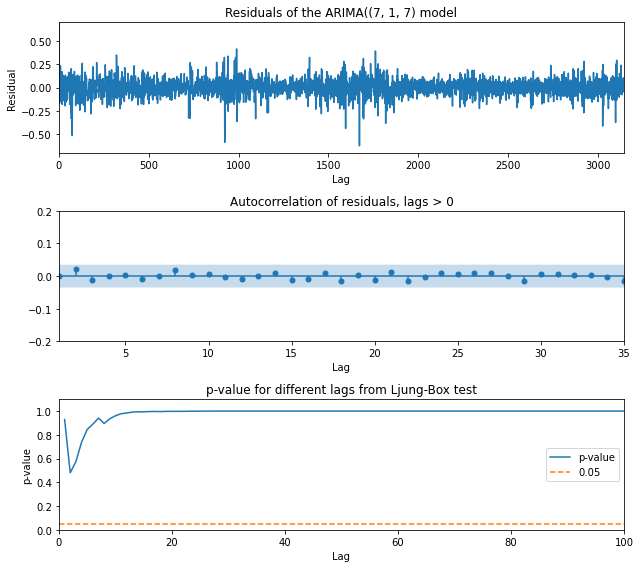

In [419]:
# Extracting the residuals
residuals = res.resid

# Ljung-box test:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungBox = acorr_ljungbox(residuals, lags= 100)

# Plot the residuals:
fig = plt.figure(figsize= (9, 8))

plt.subplot(311)
plt.plot(residuals)
plt.title(f"Residuals of the ARIMA({order} model")
plt.xlabel("Lag")
plt.ylabel("Residual")
plt.ylim(-0.7, 0.7)
plt.xlim(0, trainSize)

ax2 = plt.subplot(312)
fig = plot_acf(residuals, ax2)
ax2.set_title("Autocorrelation of residuals, lags > 0")
ax2.set_xlabel("Lag")
ax2.set_xlim(1, 35)
ax2.set_ylim(-0.2, 0.2)

plt.subplot(313)
ljungBox.lb_pvalue.plot()
plt.ylim(0, 1.1)
plt.xlim(0, 100)
plt.plot(np.ones(101) * 0.05, "--")
plt.title("p-value for different lags from Ljung-Box test")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.legend(["p-value", "0.05"])

plt.tight_layout()

fig.savefig("figures/Residuals.png", dpi= 300)

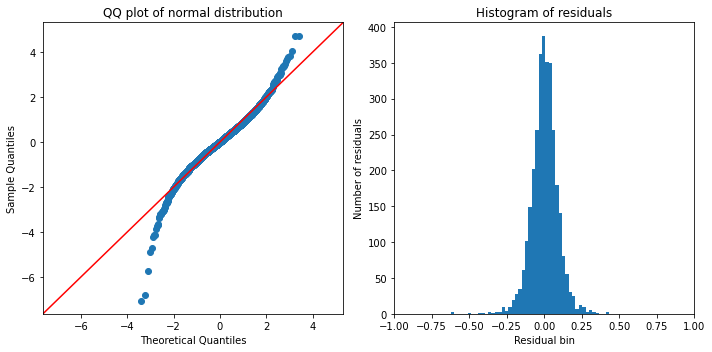

In [402]:
from statsmodels.graphics.gofplots import qqplot

fig = plt.figure(figsize= (10, 5))
ax = plt.subplot(121)
qqplot(residuals[1:], line= "45", fit= True, ax= ax)
ax.set_title("QQ plot of normal distribution")

plt.subplot(122)
plt.hist(residuals, bins= 500)
plt.xlim(-1, 1)
plt.title("Histogram of residuals")
plt.xlabel("Residual bin")
plt.ylabel("Number of residuals")

plt.tight_layout()

fig.savefig("figures/QQplotHistogram.png", dpi= 300)

## Pediction:

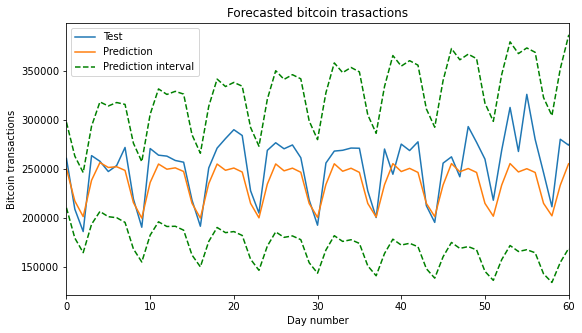

In [403]:
forecast = res.get_forecast(len(testData))

# Do the log transformation and differencing:
logTestData = np.log(np.array(testData["BitcoinTransactions"]))
diffTestData = diff(np.array(testData["BitcoinTransactions"]))

diffLogTestData = diff(logTestData, diffOrder)

# Extract the prediction interval:
predictionInterval = forecast.conf_int()

# Transform the log transfomred data back:
#prediction = np.exp(forecast.predicted_mean + forecast.var_pred_mean/2)

fig = plt.figure(figsize= (9, 5))
plt.plot(np.array(testData["BitcoinTransactions"]))
plt.plot(np.exp(forecast.predicted_mean))
plt.plot(np.exp(predictionInterval), "--", color= "green")
plt.legend(["Test", "Prediction", "Prediction interval"])
plt.title("Forecasted bitcoin trasactions")
plt.xlabel("Day number")
plt.ylabel("Bitcoin transactions")
plt.xlim(0, 60)

fig.savefig("figures/forecast.png", dpi= 300)

In [404]:
days = [1, 2, 14, 31, 61]

print(f"True values: ")
for day in days:
    true = testData["BitcoinTransactions"].iloc[day - 1]
    print(f"Day {day}: {true}")
print("\n")

print(f"Predicted values: ")
for day in days:
    predicted = np.exp(forecast.predicted_mean[day - 1])
    print(f"Day {day}: {round(predicted, 2)}")
print("\n")

print(f"Prediction interval: ")
for day in days:
    interval = np.exp(predictionInterval[day - 1])
    print(f"Day {day}: lower: {round(interval[0], 2)}, upper: {round(interval[1], 2)}")

True values: 
Day 1: 260624
Day 2: 209074
Day 14: 258590
Day 31: 192691
Day 61: 274155


Predicted values: 
Day 1: 250173.32
Day 2: 217362.7
Day 14: 251066.89
Day 31: 200627.76
Day 61: 255434.65


Prediction interval: 
Day 1: lower: 210420.65, upper: 297436.06
Day 2: lower: 179618.09, upper: 263038.91
Day 14: lower: 191627.99, upper: 328942.47
Day 31: lower: 143847.49, upper: 279820.64
Day 61: lower: 169063.05, upper: 385932.1
